<a href="https://colab.research.google.com/github/ParthKulkarni/EmailRecommmendation/blob/master/new_code_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install flanker;pip install gensim;pip install spacy;pip install pyLDAvis;python -m spacy download en;pip install matplotlib

In [0]:
!ls "/content/drive/My Drive/Dataset"
!unzip "/content/drive/My Drive/Dataset/gonuts.zip"
!tar -xf golang-nuts.tar.xz
!ls golang-nuts

gonuts.zip
Archive:  /content/drive/My Drive/Dataset/gonuts.zip
  inflating: threads.csv.gz          
  inflating: golang-nuts.tar.xz      
  inflating: index.json.gz           
0005wieRIf8  A5qfc_GMxkU  FC0APAibEhs  KHsutdDh0yM  pKm7C95d35g  uS4-cgy0L-U
002O7RNga8A  a5Ve7rHlqRQ  FC2ZKYqQt44  khswoWAoeeQ  PKm7qTtdXD0  uS4ihPyv7Cs
00F8COQBaHc  a5We-Tbkizk  fc30er0p-tM  -KhUwMYhZoA  pkmwc8k0DpU  uSaJ6dqKvzI
00ki7jzdREg  a5WHt7tfzJE  fc3lh8L_5GM  KHXJI6lG_K0  P-kNU2JUEr8  USAYrLr4sLs
00npQGuGGJg  a5XDyuY44cY  fc6afhuX5Q4  kHZpUWWpuYI  pkocjaBN5Y4  _usbgS9LeS8
00vlqSDXrWk  A64QpfGSKDE  fc7JVguAlUo  KI13HAsIFdo  PkOuHNFhmKY  uSdGRkt0eFM
00WMdR2VP3I  A6F5teB1Njg  fcAUTWeRjyk  -KI6rNVPL1A  PkOvM8dbiK4  uSDwyjC75sc
00xWO1lmzEc  a6grpnGR34c  FCb5HhFPzZc  KIbfhDuoAqk  PkpxEYVsLwk  USEcdHqA7Pc
00Y9UuwZ_DU  A6joqwiOFXY  FCcLsuWsF_U  KIBXdMEc9R8  pkRQtXmAr_g  US_F31gP6lE
016jJIrIuM4  A6n0-y-rAN4  fCdBSRNNUY8  kID0ftDQdUY  PKrtphiPGlQ  uSFM8jG7yn4
01_B1mg0l9Y  a6NKBbL9fX0  F-ce_esPDtQ  kI_g6nXaYiA  

In [0]:
!ls

drive	     golang-nuts.tar.xz  sample_data
golang-nuts  index.json.gz	 threads.csv.gz


In [0]:
!mkdir a1
!cp golang-nuts/k*/*.email a1
!ls a1 | wc -l

3013


In [0]:
!pip install flanker
!pip install gensim
!pip install spacy
!pip install pyLDAvis
!python -m spacy download en
!pip install matplotlib


    100% |████████████████████████████████| 102kB 4.4MB/s 
    100% |████████████████████████████████| 2.1MB 9.2MB/s 
    100% |████████████████████████████████| 51kB 17.7MB/s 
    100% |████████████████████████████████| 225kB 15.0MB/s 
    100% |████████████████████████████████| 122kB 23.9MB/s 
    100% |████████████████████████████████| 102kB 25.2MB/s 
    100% |████████████████████████████████| 430kB 13.5MB/s 
    100% |████████████████████████████████| 163kB 26.3MB/s 
  Running setup.py bdist_wheel for flanker ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ff/ca/4d/f12a752ded2b4b07d7bc8eb2e5f9d8e8f4c455c3ce08e35e31
  Running setup.py bdist_wheel for pycparser ... - \ done
  Stored in directory: /root/.cache/pip/wheels/f2/9a/90/de94f8556265ddc9d9c8b271b0f63e57b26fb1d67a45564511
Successfully built flanker pycparser
    100% |████████████████████████████████| 23.6MB 1.3MB/s 
    100% |████████████████████████████████| 1.4MB 13.6MB/s 
    100% |████████████████████

In [0]:
import email, glob
import pandas as pd
from flanker import mime
import string
import re

def remove_content_in_braces(msg) :
	msg1 = ''
	cnt = 0
	for char in msg :
		if char == '{' :
			cnt += 1
		elif char == '}' :
			cnt -= 1
		elif cnt == 0 :
			msg1 += char
		else :
			continue
	return msg1

def remove_func_and_struct(msg) :
	msg1 = ''
	take_line = True
	msg = msg.splitlines()
	for line in msg :
		take_line = True
		if line == '' :
			continue
		words = line.split(' ')
		if words[0] == "func" :
			take_line = False
		elif words[0] == "type" :
			if len(words)  >= 3  and words[2] == "struct" :
				take_line = False
		if take_line :
			msg1 += (line + '\n')
	return msg1

def remove_other_code_lines(msg) :
	msg1 = ''
	take_line = True
	msg = msg.splitlines()
	i = 0	
	while i < len(msg) :
		if (msg[i] == '') or ("//" in msg[i]) :
			i += 1
			continue
		take_line = True
		line = msg[i]
		if "package" in line :
			words = line.split(' ')
			if len(words) < 4 :
				take_line = False
		elif "import" in line :
			words = line.split(' ')
			if len(words) < 4 :
				take_line = False
				if "(" in line :
					while ')' not in msg[i] :
						i += 1
		elif "const" in line :
			words = line.split(' ')
			if len(words) < 4 :
				take_line = False
				if "(" in line :
					while ')' not in msg[i] :
						i += 1
		if take_line :
			msg1 += line + '\n'
		i += 1
	return msg1


def remove_code(msg) :
	msg = (remove_content_in_braces(msg))
	msg = (remove_func_and_struct(msg))
	msg = (remove_other_code_lines(msg))
	return msg

# remove_code(msg)
  
rt =''
fpath = "a1/*.email"
files = glob.glob(fpath)
for file in files :
  f = open(file, "r")
  msg = f.read()
  msg = mime.from_string(msg)
  if msg.content_type.is_singlepart():
      temp = str(msg.body)
      temp = temp.splitlines()
      for _ in temp:
          if _.startswith('>'):
              continue
          elif _.startswith('On'):
              continue
          else:
              rt+=_+"\n"
  else :
      for part in msg.parts :
          if "(text/plain)" in str(part) :
              temp = str(part.body)
              temp = temp.splitlines()
              for _ in temp :
                  if _.startswith('>') :
                      continue
                  if _.startswith('On'):
                      continue
                  else :
                      rt+=_+"\n"
               
rt = remove_code(rt)
print(rt)

Symbol 'mailbox_or_url_list' is unreachable
Symbol 'delim' is unreachable
Symbol 'mailbox_or_url' is unreachable
Symbol 'url' is unreachable
Symbol 'mailbox_or_url_list' is unreachable
Symbol 'delim' is unreachable
Symbol 'mailbox_or_url' is unreachable
Symbol 'mailbox' is unreachable
Symbol 'url' is unreachable
Symbol 'angle_addr' is unreachable
Symbol 'name_addr' is unreachable
Symbol 'phrase' is unreachable
Symbol 'mailbox_or_url_list' is unreachable
Symbol 'delim' is unreachable
Symbol 'mailbox_or_url' is unreachable
Symbol 'mailbox' is unreachable
Symbol 'addr_spec' is unreachable
Symbol 'angle_addr' is unreachable
Symbol 'name_addr' is unreachable
Symbol 'phrase' is unreachable
Symbol 'local_part' is unreachable
Symbol 'domain' is unreachable
Symbol 'quoted_string' is unreachable
Symbol 'domain_literal' is unreachable
Symbol 'quoted_string_text' is unreachable
Symbol 'domain_literal_text' is unreachable
Symbol 'mailbox_or_url_list' is unreachable
Symbol 'delim' is unreachable


I would like to see go/types go into the std lib. There is churn because I
am in an active clean-up phase. There's another round of API cleanups
coming, this was long planned. I hope by the end of the year this will be
settled. But the API changes are mostly cosmetic and not of a fundamental
nature.
declared essentially "finished" (but for bug fixes). There will always be
demands for something else, but that doesn't mean it needs to be all
satisfied with the current version.
We don't need to decide now. In early February it should be pretty obvious
if we are ready or not.
- gri
So, I'm processing information as is comes through the StdoutPipe(),
but am having a problem knowing when the output is finished.
Normally, with a file, you get an os.EOF error when you reach the end
of a file, but it doesn't look like a pipe does this, it looks like it
will just hang waiting to get the next output.
So, how do you know when the StdoutPipe() is empty(for the moment).  I
want to be able to break o

In [0]:
tt = rt
import re
tt = [re.sub(r'^https?:\/\/.*[\r\n]*', '', ww, flags=re.MULTILINE) for ww in tt]
tt = [re.sub(r'^http?:\/\/.*[\r\n]*', '', ww, flags=re.MULTILINE) for ww in tt]
tt = [re.sub(r'\S*@\S*.com\s?', '', ww, flags=re.MULTILINE) for ww in tt]
tt = ''.join(tt)
tt

'I would like to see go/types go into the std lib. There is churn because I\nam in an active clean-up phase. There\'s another round of API cleanups\ncoming, this was long planned. I hope by the end of the year this will be\nsettled. But the API changes are mostly cosmetic and not of a fundamental\nnature.\ndeclared essentially "finished" (but for bug fixes). There will always be\ndemands for something else, but that doesn\'t mean it needs to be all\nsatisfied with the current version.\nWe don\'t need to decide now. In early February it should be pretty obvious\nif we are ready or not.\n- gri\nSo, I\'m processing information as is comes through the StdoutPipe(),\nbut am having a problem knowing when the output is finished.\nNormally, with a file, you get an os.EOF error when you reach the end\nof a file, but it doesn\'t look like a pipe does this, it looks like it\nwill just hang waiting to get the next output.\nSo, how do you know when the StdoutPipe() is empty(for the moment).  I\nwan

In [0]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim
from gensim import models

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [0]:
nlp = spacy.load("en")

In [0]:
my_stop_words = ['gmail','google','github','yahoo','com','org','http','https','golang','www','regards','thanks','html5','tidyhtml5']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [0]:
ttp1 = tt

In [0]:
doc = nlp(ttp1)
print(doc)

I would like to see go/types go into the std lib. There is churn because I
am in an active clean-up phase. There's another round of API cleanups
coming, this was long planned. I hope by the end of the year this will be
settled. But the API changes are mostly cosmetic and not of a fundamental
nature.
declared essentially "finished" (but for bug fixes). There will always be
demands for something else, but that doesn't mean it needs to be all
satisfied with the current version.
We don't need to decide now. In early February it should be pretty obvious
if we are ready or not.
- gri
So, I'm processing information as is comes through the StdoutPipe(),
but am having a problem knowing when the output is finished.
Normally, with a file, you get an os.EOF error when you reach the end
of a file, but it doesn't look like a pipe does this, it looks like it
will just hang waiting to get the next output.
So, how do you know when the StdoutPipe() is empty(for the moment).  I
want to be able to break o

In [0]:
doc

I would like to see go/types go into the std lib. There is churn because I
am in an active clean-up phase. There's another round of API cleanups
coming, this was long planned. I hope by the end of the year this will be
settled. But the API changes are mostly cosmetic and not of a fundamental
nature.
declared essentially "finished" (but for bug fixes). There will always be
demands for something else, but that doesn't mean it needs to be all
satisfied with the current version.
We don't need to decide now. In early February it should be pretty obvious
if we are ready or not.
- gri
So, I'm processing information as is comes through the StdoutPipe(),
but am having a problem knowing when the output is finished.
Normally, with a file, you get an os.EOF error when you reach the end
of a file, but it doesn't look like a pipe does this, it looks like it
will just hang waiting to get the next output.
So, how do you know when the StdoutPipe() is empty(for the moment).  I
want to be able to break o

In [0]:
# we add some words to the stop word list
texts, article, skl_texts = [], [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        print('----hi i am here----\n')
        skl_texts.append(' '.join(article))
        texts.append(article)
        article = []

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i am here----

----hi i a

In [0]:
print(texts)

[['-PRON-', 'like', 'type', 'std', 'lib', 'there', 'churn', '-PRON-'], ['active', 'clean', 'phase', 'there', 'be', 'round', 'api', 'cleanup'], ['come', 'long', 'plan', '-PRON-', 'hope', 'end', 'year'], ['settle', 'but', 'api', 'change', 'cosmetic', 'fundamental'], ['nature'], ['declare', 'essentially', 'finish', 'bug', 'fix', 'there'], ['demand', 'not', 'mean', 'need'], ['satisfied', 'current', 'version'], ['-PRON-', 'not', 'need', 'decide', 'in', 'early', 'february', 'pretty', 'obvious'], ['ready'], ['gri'], ['so', '-PRON-', 'be', 'process', 'information', 'come', 'stdoutpipe'], ['have', 'problem', 'know', 'output', 'finish'], ['normally', 'file', 'os', 'eof', 'error', 'reach', 'end'], ['file', 'not', 'look', 'like', 'pipe', 'look', 'like'], ['hang', 'wait', 'output'], ['so', 'know', 'stdoutpipe', 'empty(for', 'moment', ' ', '-PRON-'], ['want', 'able', 'break', 'loop', 'leave'], ['pipe'], ['note'], ['cmd.out', '=', 'stdoutpipe'], ['in', 'example', '-PRON-', 'close', 'statement'], ['pi

In [0]:
bigram = gensim.models.Phrases(texts)

In [0]:
texts = [bigram[line] for line in texts]

In [0]:
texts[1][0:10]

['active', 'clean', 'phase', 'there', 'be', 'round', 'api', 'cleanup']

In [0]:
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)
corpus = tfidf[corpus]

In [0]:
print(dictionary)
print(corpus)
corpus[0][0:10]

Dictionary(18 unique tokens: ['-PRON-', 'like', 'type', 'be', 'need']...)


[(0, 0.546432783022372), (1, 0.5799678588285848), (2, 0.6041924332232339)]

In [0]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary,alpha='asymmetric',passes=3)

In [0]:
ldamodel.show_topics(10)

[(0,
  '0.258*"-PRON-" + 0.119*"not" + 0.069*"go" + 0.060*"need" + 0.060*"$" + 0.060*"return" + 0.056*"type" + 0.053*"good" + 0.052*"<" + 0.052*"use"'),
 (1,
  '0.433*"be" + 0.184*"think" + 0.109*"=" + 0.103*"-PRON-" + 0.039*"code" + 0.029*"like" + 0.028*"package" + 0.027*"go" + 0.020*"not" + 0.007*"use"'),
 (2,
  '0.621*" " + 0.154*"-PRON-" + 0.055*"be" + 0.053*"not" + 0.037*"think" + 0.021*"type" + 0.014*"function" + 0.013*"good" + 0.007*"return" + 0.005*"code"'),
 (3,
  '0.487*"like" + 0.440*"function" + 0.005*"-PRON-" + 0.005*"be" + 0.005*"not" + 0.005*" " + 0.005*"code" + 0.005*"$" + 0.005*"type" + 0.005*"good"'),
 (4,
  '0.056*"-PRON-" + 0.056*"be" + 0.056*"code" + 0.056*" " + 0.056*"not" + 0.056*"type" + 0.056*"like" + 0.056*"package" + 0.056*"go" + 0.056*"use"'),
 (5,
  '0.905*"code" + 0.019*"-PRON-" + 0.005*"not" + 0.005*"need" + 0.005*"go" + 0.005*"$" + 0.005*"be" + 0.005*" " + 0.005*"function" + 0.005*"good"'),
 (6,
  '0.056*"-PRON-" + 0.056*"be" + 0.056*"code" + 0.056*"not"

In [0]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic :", (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(skl_texts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(skl_texts)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
# display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, tf_feature_names, no_top_words)

Topic : 0
run plan original stream fmt com gmail println write good
Topic : 1
like set type far chris memory level john dollin allusive
Topic : 2
code file function method test match package add implement compiler
Topic : 3
work cgo my_test_pkg runtime main void note ian information func
Topic : 4
error client return process create file decoder frame normally rii
Topic : 5
goroutine err make time struct nil easy type request set
Topic : 6
pron think byte like read buffer way need new method
Topic : 7
output nil parse case instance datum 6c 6l my_main my_test_func
Topic : 8
advancingreader return int my_test_func err map os peer value channel
Topic : 9
object care long year fine ast end array refer update


In [0]:
tfidf_feature_names[2], tf_feature_names[2]

('12', '12')

In [0]:
for line in tf:
    print (line)
    break

  (0, 54)	1
  (0, 206)	1
  (0, 381)	1
  (0, 417)	1
  (0, 209)	1
  (0, 312)	2


In [0]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      40.098927        1       1 -0.112823  0.023541
1      18.611122        1       2 -0.106215 -0.050782
2      10.994964        1       3 -0.202181  0.006712
3       8.709313        1       4  0.287995  0.250542
5       6.709008        1       5  0.209723 -0.342433
4       4.002273        1       6 -0.015333  0.022458
6       3.128644        1       7 -0.015292  0.022490
7       2.820770        1       8 -0.015291  0.022491
8       2.568064        1       9 -0.015291  0.022491
9       2.356919        1      10 -0.015291  0.022491, topic_info=     Category       Freq      Term      Total  loglift  logprob
term                                                           
12    Default  34.000000      code  34.000000  18.0000  18.0000
6     Default  35.000000            35.000000  17.0000  17.0000
1     Default  27.000000      like  27.000000  16.0000  16.0000
3     Default  45.000000        be  45.000000  15.0000  15.0000
14    Default  22.000000  function  22.000000  14.0000  14.0000
10    Default  20.000000     think  20.000000  13.0000  13.0000
5     Default  27.000000       not  27.000000  12.0000  12.0000
16    Default  14.000000         $  14.000000  11.0000  11.0000
4     Default  14.000000      need  14.000000  10.0000  10.0000
9     Default  17.000000        go  17.000000   9.0000   9.0000
8     Default  14.000000    return  14.000000   8.0000   8.0000
15    Default  12.000000         <  12.000000   7.0000   7.0000
7     Default  14.000000         =  14.000000   6.0000   6.0000
13    Default  13.000000       use  13.000000   5.0000   5.0000
2     Default  14.000000      type  14.000000   4.0000   4.0000
0     Default  62.000000    -PRON-  62.000000   3.0000   3.0000
11    Default  14.000000   package  14.000000   2.0000   2.0000
17    Default  13.000000      good  13.000000   1.0000   1.0000
5      Topic1  20.145348       not  27.996946   0.5847  -2.1257
16     Topic1  10.104840         $  14.106227   0.5802  -2.8157
4      Topic1  10.128316      need  14.289237   0.5696  -2.8134
8      Topic1  10.082732    return  14.416227   0.5563  -2.8179
0      Topic1  43.629841    -PRON-  62.994785   0.5465  -1.3530
15     Topic1   8.810706         <  12.811075   0.5395  -2.9527
13     Topic1   8.798975       use  13.248029   0.5046  -2.9541
2      Topic1   9.464221      type  14.328337   0.4991  -2.8812
9      Topic1  11.729781        go  17.778267   0.4980  -2.6666
17     Topic1   8.869714      good  13.534188   0.4912  -2.9461
11     Topic1   8.773784   package  14.855515   0.3872  -2.9569
7      Topic1   2.447947         =  14.875593  -0.8907  -4.2335
...       ...        ...       ...        ...      ...      ...
8      Topic9   0.600583    return  14.416227   0.4838  -2.8904
11     Topic9   0.600583   package  14.855515   0.4538  -2.8904
7      Topic9   0.600583         =  14.875593   0.4524  -2.8904
9      Topic9   0.600583        go  17.778267   0.2742  -2.8904
10     Topic9   0.600583     think  20.498051   0.1318  -2.8904
14     Topic9   0.600583  function  22.579676   0.0351  -2.8904
1      Topic9   0.600583      like  27.111422  -0.1478  -2.8904
5      Topic9   0.600583       not  27.996946  -0.1799  -2.8904
12     Topic9   0.600583      code  34.589016  -0.3914  -2.8904
6      Topic9   0.600583            35.659378  -0.4218  -2.8904
3      Topic9   0.600584        be  45.287186  -0.6609  -2.8904
0      Topic9   0.600586    -PRON-  62.994785  -0.9909  -2.8904
15    Topic10   0.551204         <  12.811075   0.6019  -2.8904
13    Topic10   0.551204       use  13.248029   0.5683  -2.8904
17    Topic10   0.551204      good  13.534188   0.5469  -2.8904
16    Topic10   0.551204         $  14.106227   0.5055  -2.8904
4     Topic10   0.551203      need  14.289237   0.4927  -2.8904
2     Topic10   0.551204      type  14.328337   0.4899  -2.8904
8     Topic10   0.551204    return  14.416227

In [0]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

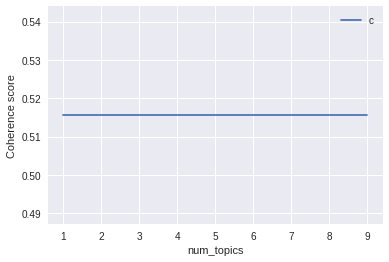

CPU times: user 3.3 s, sys: 105 ms, total: 3.41 s
Wall time: 3.29 s


In [0]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=texts, limit=10)

In [0]:
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    top_topics = [(0, 0)]
    while top_topics[0][1] < 0.97:
        lm = LdaModel(corpus=corpus, id2word=dictionary)
        coherence_values = {}
        for n, topic in lm.show_topics(num_topics=-1, formatted=False):
            topic = [word for word, _ in topic]
            cm = CoherenceModel(topics=[topic], texts=texts, dictionary=dictionary, window_size=10)
            coherence_values[n] = cm.get_coherence()
        top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    return lm, top_topics

In [0]:
lm, top_topics = ret_top_model()

In [0]:
print(top_topics[:5])

In [0]:
pprint([lm.show_topic(topicid) for topicid, c_v in top_topics[:10]])